In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
full_data = pd.read_csv(r"C:\Users\Edwin\Downloads\03_08_21_Right_UVVis")
# I am going to remove the ones with over 1000uL in water since they were mistakes
full_data = full_data[full_data['water-stock uL']<1000] # this should have also got rid of the troublesome blanks 
# full_data.loc[full_data['UID'] == 'S3_E2_03-10-2021_Left']['water-stock uL']
# pfh_controls = full_data[full_data['pfh wtf']==0]

In [130]:
samples = full_data[0:len(full_data)//2].copy()
blanks = full_data[full_data['dppc wtf']==0]

pfh_controls_samples = samples[samples['pfh wtf']==0]
pfh_controls_blank = blank[0:6]

pfh_controls_samples

,UID,dppc wtf,dspepeg200 wtf,pfh wtf,ethanol wtf,water wtf,Well,Labware,Slot,dppc-ethanol-stock uL,...,450.0nm,500.0nm,550.0nm,600.0nm,650.0nm,700.0nm,750.0nm,800.0nm,850.0nm,900.0nm
1,S2_A2_03-10-2021_Right,0.0001,0.000035,0.0,0.333333,0.666532,A2,Falcon 48 Well Plate 1500 ÂµL,2,75.000004,...,0.047,0.044,0.043,0.043,0.042,0.041,0.048,0.047,0.051,0.068
2,S2_A3_03-10-2021_Right,0.0001,0.000035,0.0,0.444444,0.555421,A3,Falcon 48 Well Plate 1500 ÂµL,2,75.000004,...,0.050,0.047,0.045,0.043,0.041,0.040,0.045,0.044,0.047,0.065
3,S2_A4_03-10-2021_Right,0.0001,0.000035,0.0,0.555556,0.444309,A4,Falcon 48 Well Plate 1500 ÂµL,2,75.000004,...,0.048,0.045,0.044,0.044,0.043,0.042,0.046,0.045,0.047,0.065
4,S2_A5_03-10-2021_Right,0.0001,0.000035,0.0,0.666667,0.333198,A5,Falcon 48 Well Plate 1500 ÂµL,2,75.000004,...,0.041,0.039,0.039,0.040,0.038,0.038,0.043,0.042,0.045,0.067
5,S2_A6_03-10-2021_Right,0.0001,0.000035,0.0,0.777778,0.222087,A6,Falcon 48 Well Plate 1500 ÂµL,2,75.000004,...,0.039,0.038,0.038,0.038,0.037,0.037,0.041,0.041,0.043,0.066
6,S2_A7_03-10-2021_Right,0.0001,0.000035,0.0,0.888889,0.110976,A7,Falcon 48 Well Plate 1500 ÂµL,2,75.000004,...,0.040,0.039,0.039,0.039,0.038,0.037,0.041,0.041,0.042,0.065


In [137]:
wavelength_columns = [col for col in pfh_controls_samples.columns if 'nm' in col]
wavelengths = [float(wavelength.replace("nm","")) for wavelength in wavelength_columns]

In [153]:
spectra_data = pfh_controls_samples[wavelength_columns]
# spectra_data.index = pfh_controls_samples['UID']
spectra_data.reset_index(inplace = True, drop = True)

In [160]:
spectra_data_blank = pfh_controls_blank[wavelength_columns]
# spectra_data_blank.index = pfh_controls_blank['UID']
spectra_data_blank.reset_index(inplace = True, drop = True)
spectra_data_blank

,300.0nm,350.0nm,400.0nm,450.0nm,500.0nm,550.0nm,600.0nm,650.0nm,700.0nm,750.0nm,800.0nm,850.0nm,900.0nm
0,0.285,0.064,0.042,0.039,0.038,0.038,0.038,0.037,0.037,0.043,0.043,0.047,0.064
1,0.426,0.188,0.158,0.151,0.145,0.143,0.142,0.141,0.140,0.145,0.143,0.146,0.167
2,0.297,0.071,0.050,0.048,0.048,0.049,0.050,0.048,0.048,0.054,0.054,0.059,0.076
3,0.292,0.065,0.042,0.039,0.037,0.038,0.038,0.037,0.037,0.042,0.041,0.044,0.065
4,0.303,0.069,0.045,0.042,0.041,0.041,0.042,0.041,0.040,0.044,0.044,0.046,0.068
5,0.305,0.075,0.051,0.048,0.046,0.046,0.046,0.045,0.044,0.043,0.043,0.042,0.043


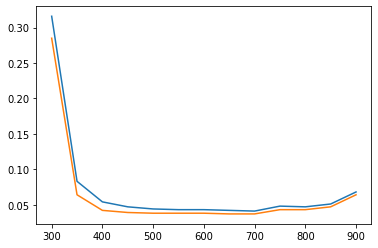

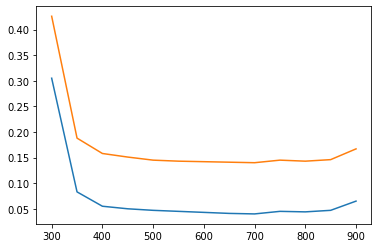

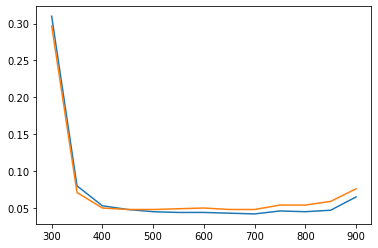

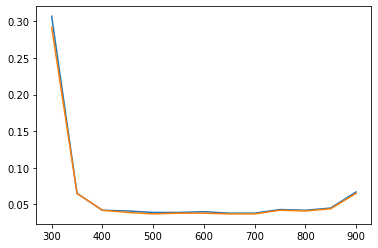

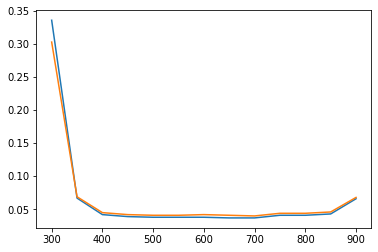

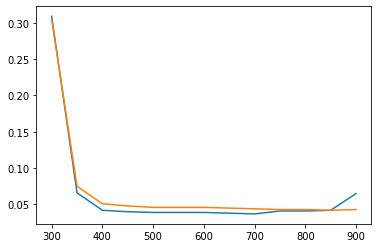

In [165]:
for i, row in spectra_data.iterrows():
    sample = row
    blank = spectra_data_blank.iloc[i-1]
    fig, ax = plt.subplots()
    ax.plot(wavelengths, sample)
    ax.plot(wavelengths, blank)
    

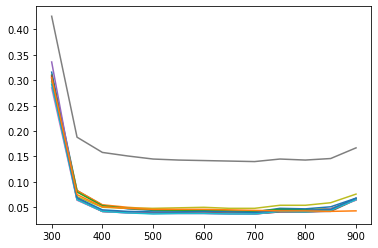

In [136]:
for i, row in spectra_data.iterrows():
    absorbances = list(row) 
    plt.plot(wavelengths, absorbances)
    
for i, row in spectra_data_blank.iterrows():
    absorbances = list(row) 
    plt.plot(wavelengths, absorbances)

In [112]:
# let blank the data 
spectra_data_full = spectra_data.copy()
spectra_data_samples = spectra_data_full[0:len(spectra_data_full)//2].copy()
spectra_data_blank = spectra_data_full[len(spectra_data_full)//2:len(spectra_data_full)].copy()

In [ ]:

spectra_data_samples.reset_index(drop = True, inplace = True) # might need to do a copy 
spectra_data_blank.reset_index(drop = True, inplace = True)
spectra_data_blanked = spectra_data_samples-spectra_data_blank

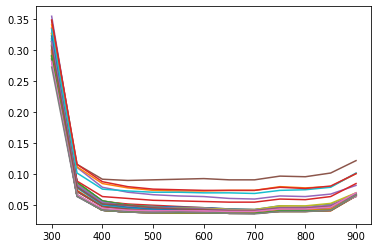

In [105]:
for i, row in spectra_data_samples.iterrows():
    absorbances = list(row) 
    plt.plot(wavelengths, absorbances)

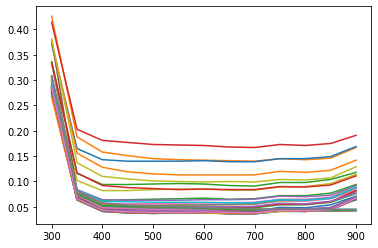

In [106]:
for i, row in spectra_data_blank.iterrows():
    absorbances = list(row) 
    plt.plot(wavelengths, absorbances)

In [94]:
spectra_data_samples.reset_index(drop = True, inplace = True) # might need to do a copy 
spectra_data_blank.reset_index(drop = True, inplace = True)
spectra_data_blanked = spectra_data_samples-spectra_data_blank
spectra_data_blanked

,300.0nm,350.0nm,400.0nm,450.0nm,500.0nm,550.0nm,600.0nm,650.0nm,700.0nm,750.0nm,800.0nm,850.0nm,900.0nm
0,0.047,0.036,0.033,0.027,0.024,0.023,0.023,0.026,0.026,0.028,0.025,0.024,0.027
1,-0.026,-0.023,-0.027,-0.029,-0.031,-0.033,-0.033,-0.033,-0.032,-0.033,-0.033,-0.035,-0.035
2,0.021,0.014,0.010,0.008,0.007,0.006,0.006,0.006,0.006,0.005,0.004,0.004,0.000
3,0.032,0.010,0.007,0.007,0.007,0.005,0.004,0.004,0.003,0.003,0.004,0.004,0.001
4,0.046,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.002
5,0.015,-0.003,-0.003,-0.003,-0.002,-0.002,-0.002,-0.002,-0.002,0.002,0.002,0.003,0.026
6,0.042,0.019,0.012,0.008,0.008,0.005,0.004,0.003,0.002,0.001,0.001,0.002,0.000
7,0.016,0.008,0.001,-0.004,-0.007,-0.007,-0.007,-0.006,-0.008,-0.008,-0.010,-0.011,-0.011
8,0.056,0.025,0.020,0.017,0.015,0.013,0.012,0.011,0.009,0.008,0.007,0.006,0.002
9,0.042,0.022,0.015,0.011,0.009,0.006,0.006,0.005,0.005,0.005,0.004,0.004,0.002


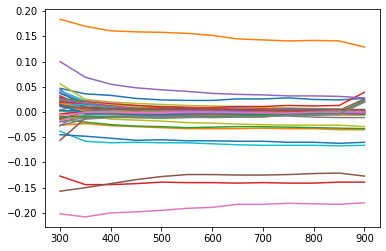

In [95]:
for i, row in spectra_data_blanked.iterrows():
    absorbances = list(row) 
    plt.plot(wavelengths, absorbances)